###Adding Libraries

In [275]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#Plant 1

##Generalities

In [276]:
generation = pd.read_csv("/content/drive/MyDrive/eiLink/Plant_1_Generation_Data.csv")
weather = pd.read_csv("/content/drive/MyDrive/eiLink/Plant_1_Weather_Sensor_Data.csv")

In [277]:
print(generation.head(2))
print(weather.head(2))

          DATE_TIME  PLANT_ID  ... DAILY_YIELD  TOTAL_YIELD
0  15-05-2020 00:00   4135001  ...         0.0    6259559.0
1  15-05-2020 00:00   4135001  ...         0.0    6183645.0

[2 rows x 7 columns]
             DATE_TIME  PLANT_ID  ... MODULE_TEMPERATURE  IRRADIATION
0  2020-05-15 00:00:00   4135001  ...          22.857507          0.0
1  2020-05-15 00:15:00   4135001  ...          22.761668          0.0

[2 rows x 6 columns]


Removing Seconds

In [278]:
generation['DATE_TIME'] =  pd.to_datetime(generation['DATE_TIME'], format='%d-%m-%Y %H:%M')
# .dt.strftime("%d-%m-%Y %H:%M")
weather['DATE_TIME'] =  pd.to_datetime(weather['DATE_TIME'], format='%Y-%m-%d %H:%M')
# .dt.strftime("%d-%m-%Y %H:%M")

In [279]:
show(generation.head(10))

In [280]:
show(weather.head(10))

Creatng one General Table

In [281]:
full_table = pd.merge(left=generation, right=weather, how="inner", left_on=['DATE_TIME', 'PLANT_ID'], right_on=['DATE_TIME', 'PLANT_ID'])
show(full_table.head(10))

In [282]:
print(full_table.columns)

Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY_x', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD', 'SOURCE_KEY_y', 'AMBIENT_TEMPERATURE',
       'MODULE_TEMPERATURE', 'IRRADIATION'],
      dtype='object')


Naming and Counting Panels

In [283]:
test = full_table.copy()

panels = test['SOURCE_KEY_x'].unique()

# getting new colour for every iteration
from itertools import cycle
cycol = cycle('bgrcmk') 

for i, p in enumerate(panels):
  test.loc[test['SOURCE_KEY_x'] == p, "sensor"] = i
  print(p,"\t",i)

1BY6WEcLGh8j5v7 	 0
1IF53ai7Xc0U56Y 	 1
3PZuoBAID5Wc2HD 	 2
7JYdWkrLSPkdwr4 	 3
McdE0feGgRqW7Ca 	 4
VHMLBKoKgIrUVDU 	 5
WRmjgnKYAwPKWDb 	 6
ZnxXDlPa8U1GXgE 	 7
ZoEaEvLYb1n2sOq 	 8
adLQvlD726eNBSB 	 9
bvBOhCH3iADSZry 	 10
iCRJl6heRkivqQ3 	 11
ih0vzX44oOqAx2f 	 12
pkci93gMrogZuBj 	 13
rGa61gmuvPhdLxV 	 14
sjndEbLyjtCKgGv 	 15
uHbuxQJl8lW7ozc 	 16
wCURE6d3bPkepu2 	 17
z9Y9gH1T5YWrNuG 	 18
zBIq5rxdHJRwDNY 	 19
zVJPv84UY57bAof 	 20
YxYtjZvoooNbGkE 	 21


Creating a new column for the difference in temperatures

In [284]:
full_table['TEMPERATURE_DIFFERENCE']=full_table['MODULE_TEMPERATURE'] - full_table['AMBIENT_TEMPERATURE']
print(full_table)

                DATE_TIME  PLANT_ID  ... IRRADIATION  TEMPERATURE_DIFFERENCE
0     2020-05-15 00:00:00   4135001  ...         0.0               -2.326809
1     2020-05-15 00:00:00   4135001  ...         0.0               -2.326809
2     2020-05-15 00:00:00   4135001  ...         0.0               -2.326809
3     2020-05-15 00:00:00   4135001  ...         0.0               -2.326809
4     2020-05-15 00:00:00   4135001  ...         0.0               -2.326809
...                   ...       ...  ...         ...                     ...
68769 2020-06-17 23:45:00   4135001  ...         0.0               -1.481315
68770 2020-06-17 23:45:00   4135001  ...         0.0               -1.481315
68771 2020-06-17 23:45:00   4135001  ...         0.0               -1.481315
68772 2020-06-17 23:45:00   4135001  ...         0.0               -1.481315
68773 2020-06-17 23:45:00   4135001  ...         0.0               -1.481315

[68774 rows x 12 columns]


In [285]:
show(full_table.head(10))

Trying various plots for finding relations

In [286]:
# plt.figure(figsize=(28,20))
# for i in panels[:]:
#   myvariable = test[test['SOURCE_KEY_x']==i]
#   for ind,j in enumerate(['DATE_TIME', 'IRRADIATION', 'MODULE_TEMPERATURE', 'AMBIENT_TEMPERATURE']):
#     plt.subplot(5,1,ind+1)
#     plt.scatter(myvariable[j], myvariable['TOTAL_YIELD'], alpha=1, s=0.3, c = next(cycol))
#     plt.xlabel(j)
#     plt.ylabel('TOTAL_YIELD')
# plt.show()

In [287]:
# plt.figure(figsize=(28,20))
# for i in panels[:]:
#   myvariable = test[test['SOURCE_KEY_x']==i]
#   for ind,j in enumerate(['DATE_TIME', 'TOTAL_YIELD', 'MODULE_TEMPERATURE', 'AMBIENT_TEMPERATURE']):
#     plt.subplot(5,1,ind+1)
#     plt.scatter(myvariable[j], myvariable['IRRADIATION'], alpha=1, s=0.3, c = next(cycol))
#     plt.xlabel(j)
#     plt.ylabel('IRRADIATION')
# plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



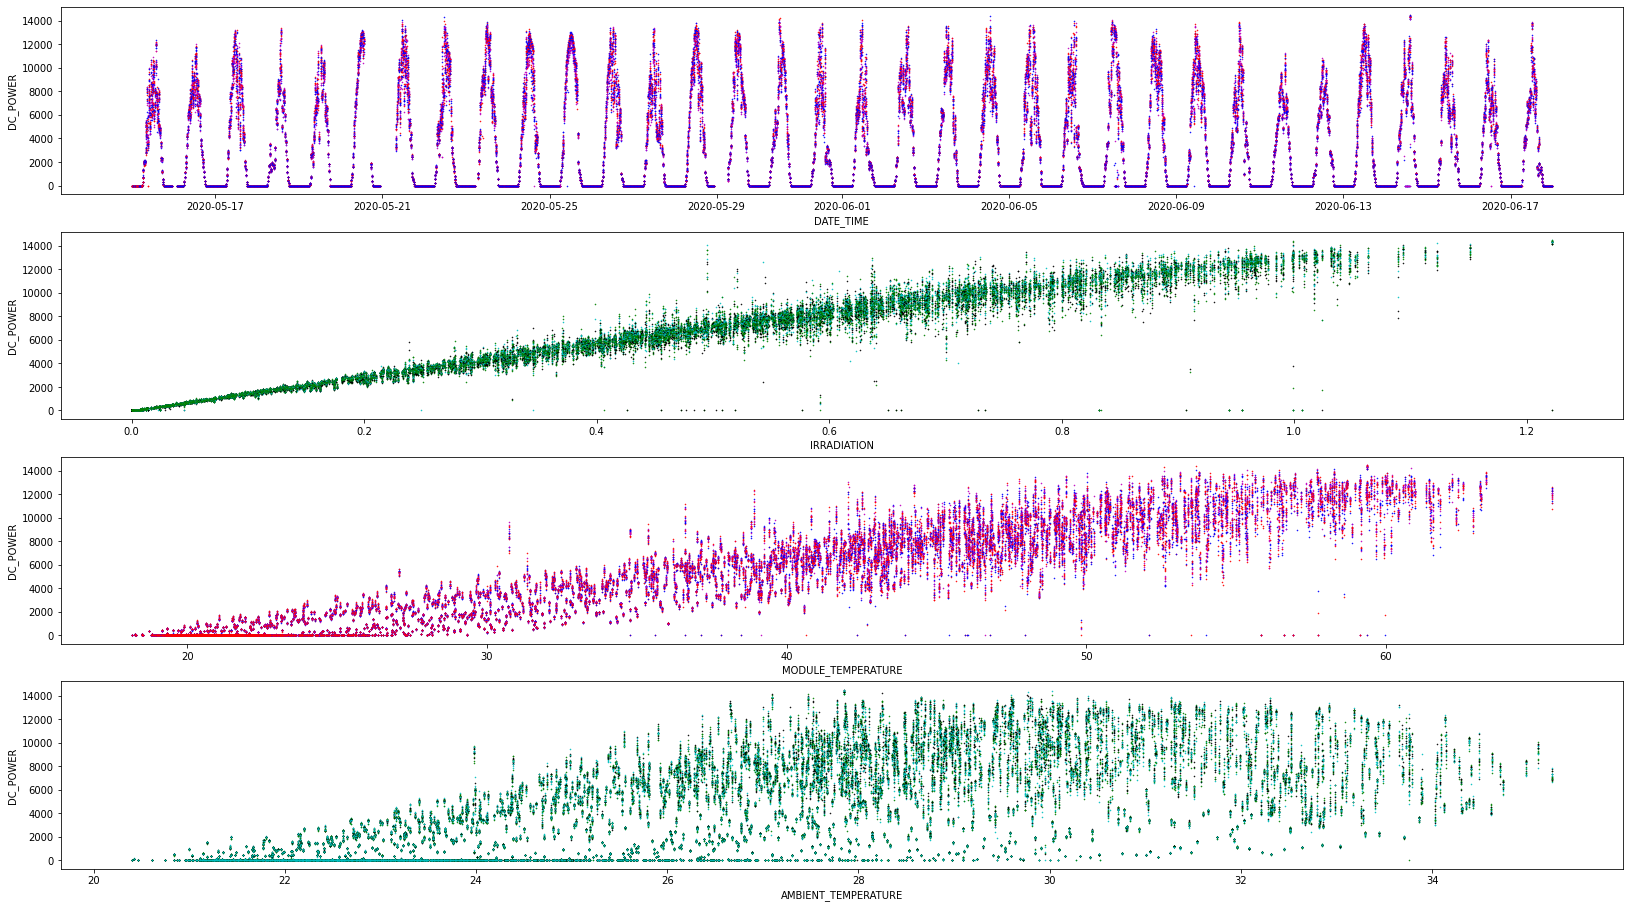

In [288]:
plt.figure(figsize=(28,20))
for i in panels[:]:
  myvariable = test[test['SOURCE_KEY_x']==i]
  for ind,j in enumerate(['DATE_TIME', 'IRRADIATION', 'MODULE_TEMPERATURE', 'AMBIENT_TEMPERATURE']):
    plt.subplot(5,1,ind+1)
    plt.scatter(myvariable[j], myvariable['DC_POWER'], alpha=1, s=0.3, c = next(cycol))
    plt.xlabel(j)
    plt.ylabel('DC_POWER')
plt.show()

In [289]:
import plotly.express as px
for i in panels[:]:
  myvariable = test[test['SOURCE_KEY_x']==i]
  fig = px.scatter(full_table, x = 'IRRADIATION', y = 'TEMPERATURE_DIFFERENCE', trendline="ols")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

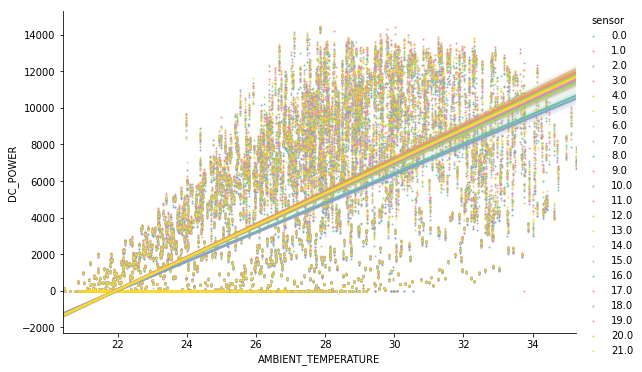

In [290]:
import seaborn as sns
graph= sns.lmplot(x='AMBIENT_TEMPERATURE', y='DC_POWER', hue='sensor',
               data=test, scatter_kws={"s": 1}, height = 5, aspect = 1.6, palette="Set2")

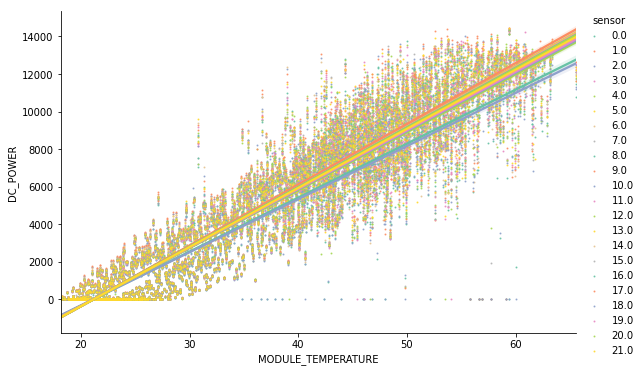

In [291]:
graph= sns.lmplot(x='MODULE_TEMPERATURE', y='DC_POWER', hue='sensor',
               data=test, scatter_kws={"s": 1}, height = 5, aspect = 1.6, palette="Set2")

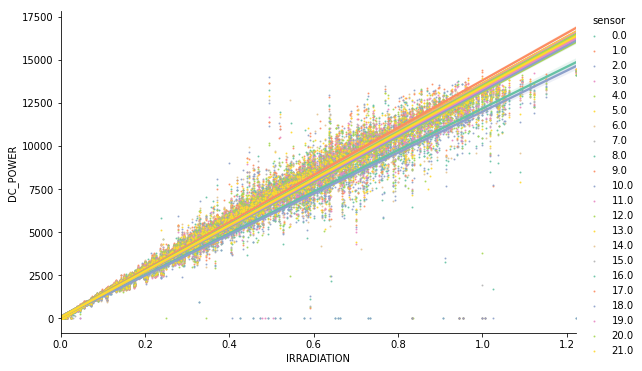

In [292]:
graph= sns.lmplot(x='IRRADIATION', y='DC_POWER', hue='sensor',
               data=test, scatter_kws={"s": 1}, height = 5, aspect = 1.6, palette="Set2")

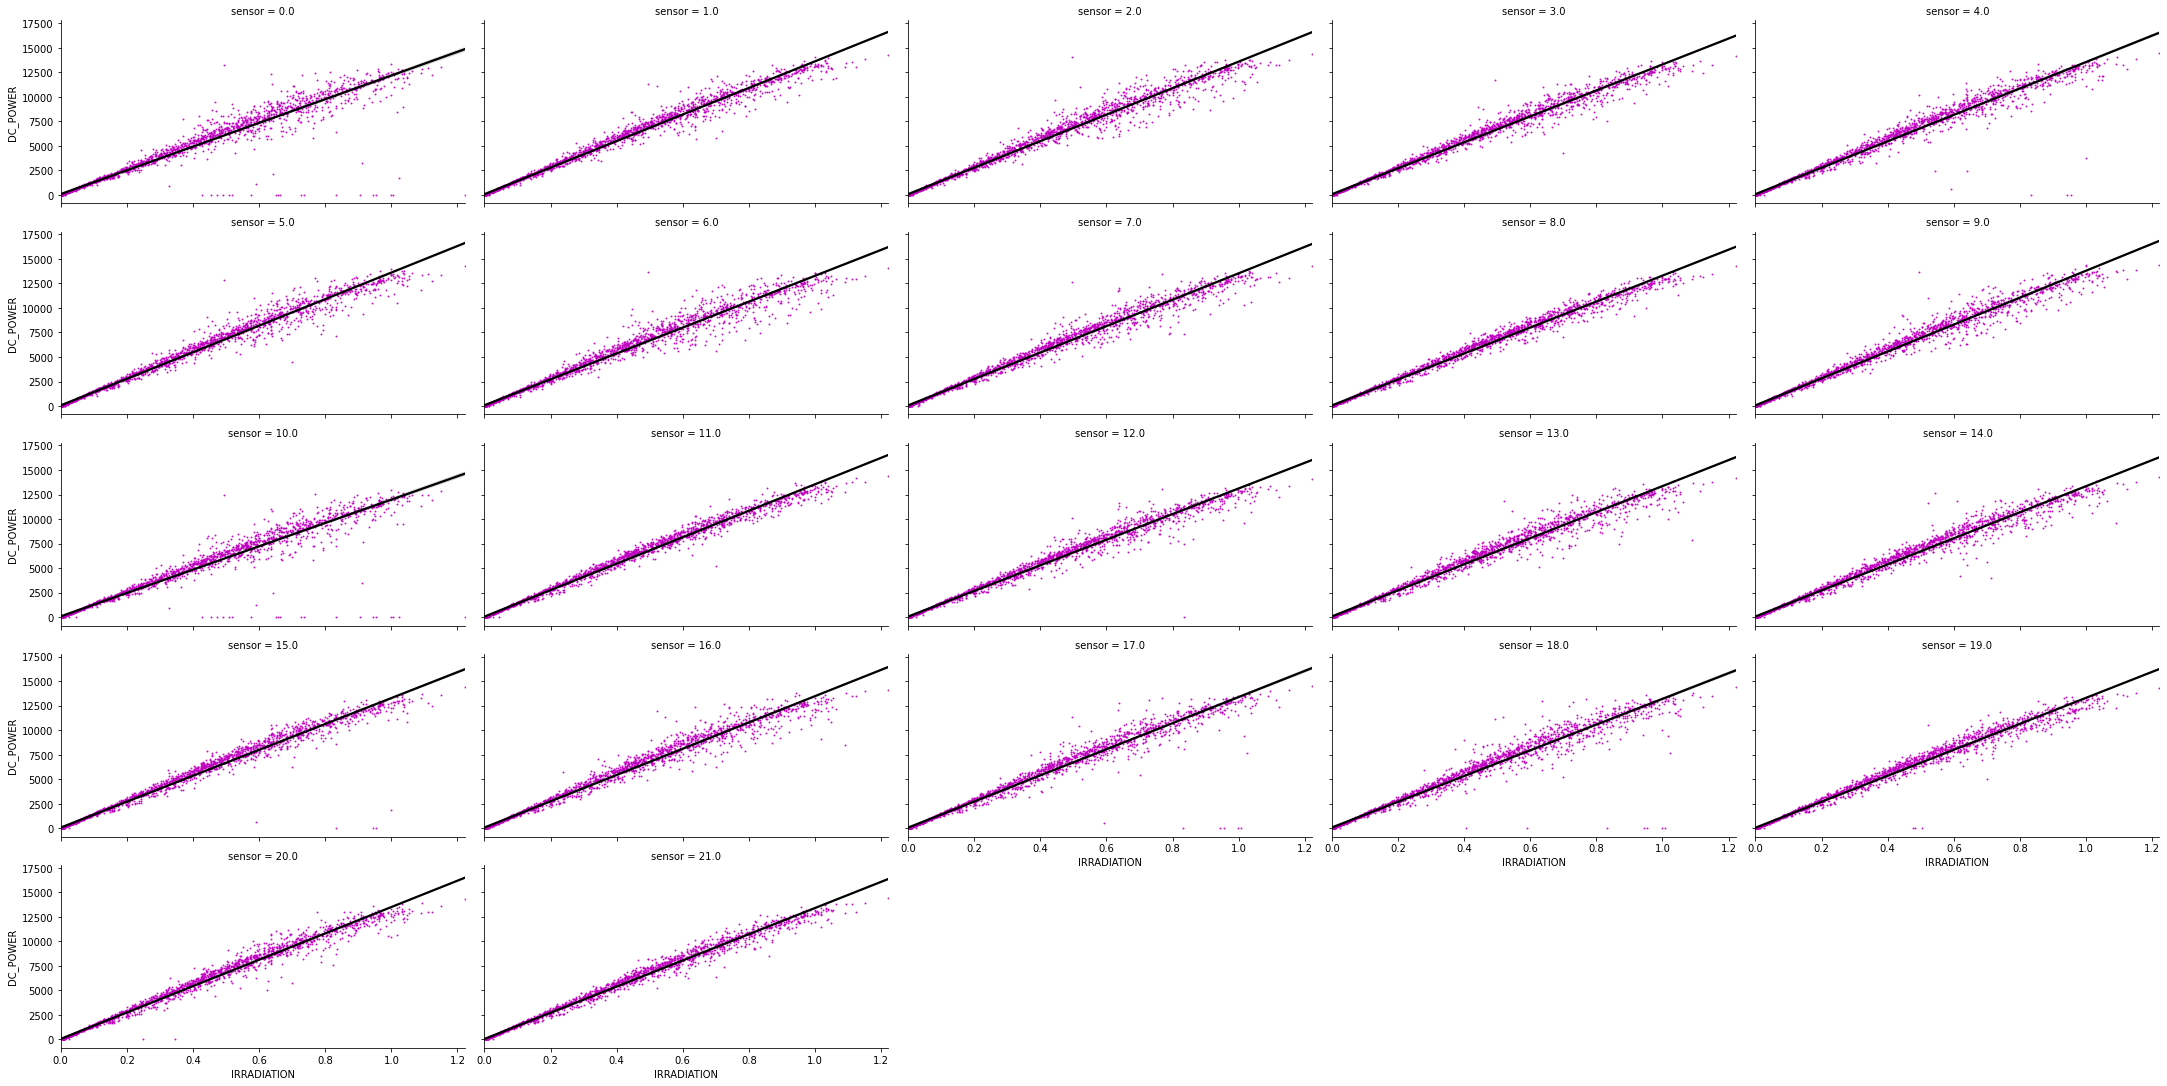

In [293]:
graph= sns.lmplot(x='IRRADIATION', y='DC_POWER', col='sensor', col_wrap=5, 
               data=test, scatter_kws={"s": 1, "color": next(cycol)}, height = 3, aspect = 2, line_kws={"color": next(cycol)})

##Cleaning/Maintenance

Finding the slope for each sensor

In [294]:
from sklearn import linear_model
from sklearn import metrics
MAE=[]
MSE=[]
RMSE=[]

regr = linear_model.LinearRegression()
slopes = []
for i in range(len(panels[:])):
  myvariable = test[test['sensor']==i]
  x = myvariable['IRRADIATION'].values.reshape(-1,1)
  y = myvariable['DC_POWER'].values.reshape(-1,1)
  regr.fit(x,y)
  slopes.append(round(float(regr.coef_[0]),3))
  print(i,slopes[-1])

  MAE.append((round(float(metrics.mean_absolute_error(myvariable['IRRADIATION'], myvariable['DC_POWER'])),3)))
  MSE.append((round(float(metrics.mean_squared_error(myvariable['IRRADIATION'], myvariable['DC_POWER'])),3)))
  RMSE.append((round(float(np.sqrt(metrics.mean_squared_error(myvariable['IRRADIATION'], myvariable['DC_POWER']))),3)))

0 12078.137
1 13542.815
2 13510.217
3 13226.334
4 13467.664
5 13532.564
6 13193.023
7 13463.614
8 13229.697
9 13720.496
10 11893.222
11 13487.275
12 13057.243
13 13276.699
14 13280.334
15 13197.261
16 13391.363
17 13309.222
18 13105.41
19 13238.839
20 13433.557
21 13342.434


Printing the values of errors

In [295]:
for i in range(len(panels[:])):
  print(f"For the sensor number {i}    MAE={MAE[i]}    MSE={MSE[i]}    RMSE={RMSE[i]}")

For the sensor number 0    MAE=2873.499    MSE=22396487.133    RMSE=4732.493
For the sensor number 1    MAE=3224.893    MSE=27350337.707    RMSE=5229.755
For the sensor number 2    MAE=3220.783    MSE=27328204.104    RMSE=5227.638
For the sensor number 3    MAE=3132.66    MSE=25925939.583    RMSE=5091.752
For the sensor number 4    MAE=3211.077    MSE=27253745.432    RMSE=5220.512
For the sensor number 5    MAE=3209.871    MSE=27227694.819    RMSE=5218.016
For the sensor number 6    MAE=3155.152    MSE=26180774.315    RMSE=5116.715
For the sensor number 7    MAE=3193.827    MSE=26937331.291    RMSE=5190.119
For the sensor number 8    MAE=3138.777    MSE=25930082.329    RMSE=5092.159
For the sensor number 9    MAE=3268.073    MSE=28110263.96    RMSE=5301.911
For the sensor number 10    MAE=2828.778    MSE=21674569.393    RMSE=4655.595
For the sensor number 11    MAE=3195.842    MSE=26913478.686    RMSE=5187.82
For the sensor number 12    MAE=3097.483    MSE=25356791.196    RMSE=5035.553

In [296]:
MAEcopy=MAE.copy()
for i in range(len(panels[:])):
  print(f"Mean Absolute Error for sensor {MAE.index(max(MAEcopy))} is {max(MAEcopy)}")
  MAEcopy.remove(max(MAEcopy))

Mean Absolute Error for sensor 9 is 3268.073
Mean Absolute Error for sensor 1 is 3224.893
Mean Absolute Error for sensor 2 is 3220.783
Mean Absolute Error for sensor 4 is 3211.077
Mean Absolute Error for sensor 5 is 3209.871
Mean Absolute Error for sensor 11 is 3195.842
Mean Absolute Error for sensor 16 is 3195.084
Mean Absolute Error for sensor 7 is 3193.827
Mean Absolute Error for sensor 20 is 3187.005
Mean Absolute Error for sensor 21 is 3179.259
Mean Absolute Error for sensor 17 is 3169.075
Mean Absolute Error for sensor 13 is 3166.367
Mean Absolute Error for sensor 14 is 3163.008
Mean Absolute Error for sensor 6 is 3155.152
Mean Absolute Error for sensor 19 is 3148.358
Mean Absolute Error for sensor 15 is 3148.04
Mean Absolute Error for sensor 8 is 3138.777
Mean Absolute Error for sensor 3 is 3132.66
Mean Absolute Error for sensor 18 is 3132.269
Mean Absolute Error for sensor 12 is 3097.483
Mean Absolute Error for sensor 0 is 2873.499
Mean Absolute Error for sensor 10 is 2828.778


In [297]:
RMSEcopy=RMSE.copy()
for i in range(len(panels[:])):
  print(f"Root Mean Square Error for sensor {RMSE.index(max(RMSEcopy))} is {max(RMSEcopy)}")
  RMSEcopy.remove(max(RMSEcopy))

Root Mean Square Error for sensor 9 is 5301.911
Root Mean Square Error for sensor 1 is 5229.755
Root Mean Square Error for sensor 2 is 5227.638
Root Mean Square Error for sensor 4 is 5220.512
Root Mean Square Error for sensor 5 is 5218.016
Root Mean Square Error for sensor 7 is 5190.119
Root Mean Square Error for sensor 11 is 5187.82
Root Mean Square Error for sensor 16 is 5179.251
Root Mean Square Error for sensor 20 is 5176.958
Root Mean Square Error for sensor 17 is 5166.639
Root Mean Square Error for sensor 21 is 5148.1
Root Mean Square Error for sensor 13 is 5133.889
Root Mean Square Error for sensor 14 is 5130.252
Root Mean Square Error for sensor 6 is 5116.715
Root Mean Square Error for sensor 15 is 5112.014
Root Mean Square Error for sensor 19 is 5108.928
Root Mean Square Error for sensor 18 is 5101.622
Root Mean Square Error for sensor 8 is 5092.159
Root Mean Square Error for sensor 3 is 5091.752
Root Mean Square Error for sensor 12 is 5035.553
Root Mean Square Error for senso

Finding the deviation of a slope relative to the average slope

In [298]:
slope_difference=[]
for i in slopes[:]:
  slope_difference.append(abs(i-np.mean(slopes)))

arranged_diff={}
for i in slope_difference:
  arranged_diff[slope_difference.index(i)]=i

arranged_diff=sorted(arranged_diff.items(), key=lambda x: x[1], reverse=True)
for key, value in arranged_diff:
    print(f"The slope difference for sensor {key} is {round(value,3)}")

The slope difference for sensor 10 is 1333.024
The slope difference for sensor 0 is 1148.109
The slope difference for sensor 9 is 494.25
The slope difference for sensor 1 is 316.569
The slope difference for sensor 5 is 306.318
The slope difference for sensor 2 is 283.971
The slope difference for sensor 11 is 261.029
The slope difference for sensor 4 is 241.418
The slope difference for sensor 7 is 237.368
The slope difference for sensor 20 is 207.311
The slope difference for sensor 12 is 169.003
The slope difference for sensor 16 is 165.117
The slope difference for sensor 18 is 120.836
The slope difference for sensor 21 is 116.188
The slope difference for sensor 17 is 82.976
The slope difference for sensor 14 is 54.088
The slope difference for sensor 13 is 50.453
The slope difference for sensor 6 is 33.223
The slope difference for sensor 15 is 28.985
The slope difference for sensor 19 is 12.593
The slope difference for sensor 8 is 3.451
The slope difference for sensor 3 is 0.088


##Forecast/Prediction

Neural Networks Keras

In [299]:
dataset = full_table.values
dataset

array([[Timestamp('2020-05-15 00:00:00'), 4135001, '1BY6WEcLGh8j5v7',
        ..., 22.8575074, 0.0, -2.32680873333333],
       [Timestamp('2020-05-15 00:00:00'), 4135001, '1IF53ai7Xc0U56Y',
        ..., 22.8575074, 0.0, -2.32680873333333],
       [Timestamp('2020-05-15 00:00:00'), 4135001, '3PZuoBAID5Wc2HD',
        ..., 22.8575074, 0.0, -2.32680873333333],
       ...,
       [Timestamp('2020-06-17 23:45:00'), 4135001, 'z9Y9gH1T5YWrNuG',
        ..., 20.427972399999998, 0.0, -1.4813152666666731],
       [Timestamp('2020-06-17 23:45:00'), 4135001, 'zBIq5rxdHJRwDNY',
        ..., 20.427972399999998, 0.0, -1.4813152666666731],
       [Timestamp('2020-06-17 23:45:00'), 4135001, 'zVJPv84UY57bAof',
        ..., 20.427972399999998, 0.0, -1.4813152666666731]], dtype=object)

In [300]:
X = dataset[:,3:7]
Y = dataset[:,10]
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

Training the model

In [301]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(4,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.add(Dense(1, input_dim=1, kernel_initializer ='normal', activation='relu'))

model.compile(optimizer='adam',loss='mean_squared_error')

X_train=np.asarray(X_train).astype(np.int)
Y_train=np.asarray(Y_train).astype(np.int)

X_val=np.asarray(X_val).astype(np.int)
Y_val=np.asarray(Y_val).astype(np.int)

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
1505/1505 [==============================] - 3s 2ms/step - loss: 0.0108 - val_loss: 0.0091
Epoch 2/100
1505/1505 [==============================] - 2s 1ms/step - loss: 0.0102 - val_loss: 0.0091
Epoch 3/100
1505/1505 [==============================] - 2s 1ms/step - loss: 0.0102 - val_loss: 0.0091
Epoch 4/100
1505/1505 [==============================] - 2s 1ms/step - loss: 0.0101 - val_loss: 0.0091
Epoch 5/100
1505/1505 [==============================] - 2s 1ms/step - loss: 0.0101 - val_loss: 0.0091
Epoch 6/100
1505/1505 [==============================] - 2s 1ms/step - loss: 0.0100 - val_loss: 0.0091
Epoch 7/100
1505/1505 [==============================] - 2s 1ms/step - loss: 0.0101 - val_loss: 0.0091
Epoch 8/100
1505/1505 [==============================] - 2s 1ms/step - loss: 0.0106 - val_loss: 0.0091
Epoch 9/100
1505/1505 [==============================] - 2s 1ms/step - loss: 0.0106 - val_loss: 0.0091
Epoch 10/100
1505/1505 [==============================] - 2s 1ms/step - l

Evaluating the loss

In [302]:
X_test=np.asarray(X_test).astype(np.int)
Y_test=np.asarray(Y_test).astype(np.int)

model.evaluate(X_test, Y_test)

323/323 [==============================] - 0s 832us/step - loss: 0.0098


0.009789667092263699

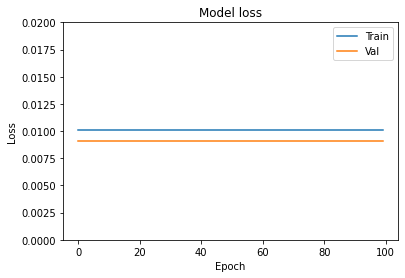

In [303]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(0.00, 0.02)
plt.show()

Prophet

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


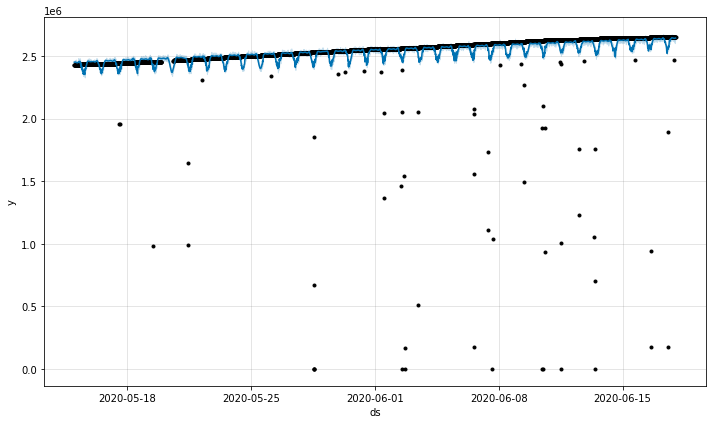

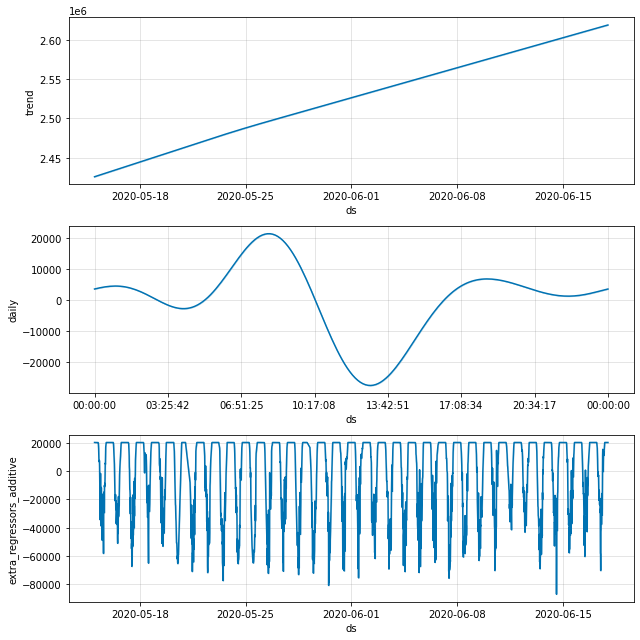

In [351]:
def predict(data, with_regr = True, num_days = 0, interval_width=0.05):
  myvariable = data.copy()
  myvariable.rename(columns={'DATE_TIME':'ds','TOTAL_YIELD':'y'}, inplace=True)
  from fbprophet import Prophet
  m = Prophet(interval_width=interval_width, daily_seasonality=True,
              weekly_seasonality=False)
  if with_regr:
    m.add_regressor('IRRADIATION')
  model = m.fit(myvariable)
  if with_regr:
    future = weather[['DATE_TIME',"IRRADIATION"]]
    future.columns = ['ds','IRRADIATION']
  else:
    future = m.make_future_dataframe(periods=24*num_days,freq='h')
  future.tail()
  forecast = m.predict(future)
  forecast.tail()
  plot1 = m.plot(forecast)
  plot2 = m.plot_components(forecast)

predict(test[test.sensor==0])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


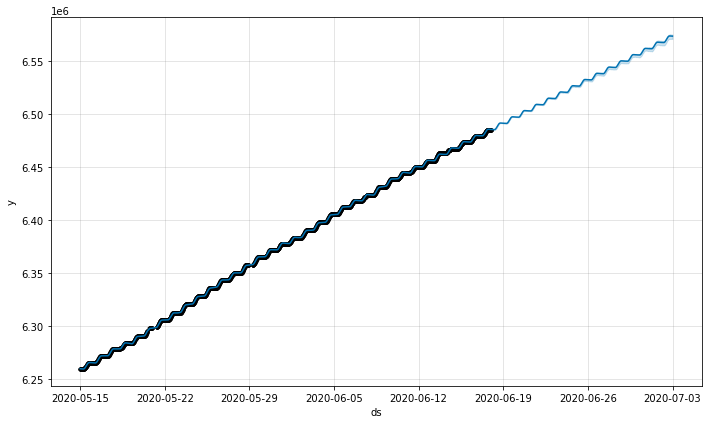

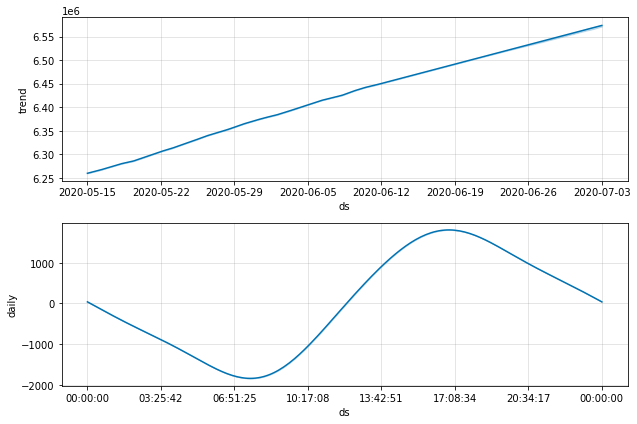

In [305]:
predict(test[test.sensor==0], with_regr=False, num_days = 15)

##Repair

Text(0.5, 0, 'Date')

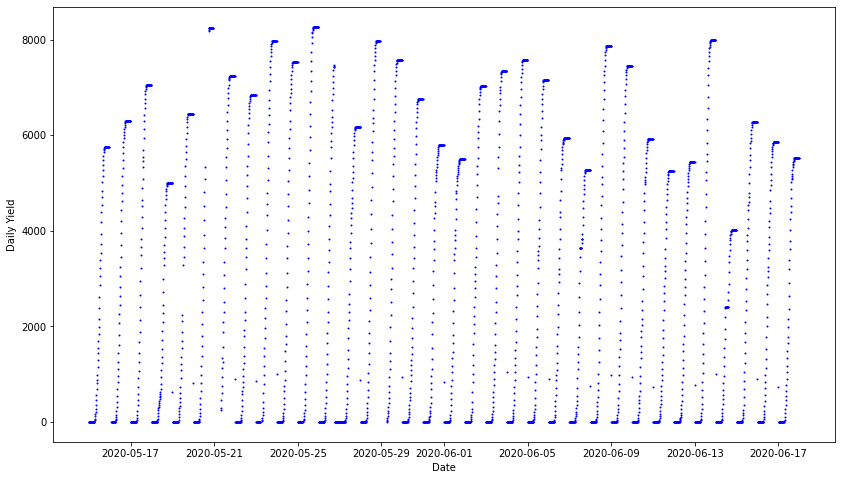

In [306]:
plt.rcParams['figure.figsize'] = (14, 8)
myvariable = test[test['sensor']==0]
myvariable = myvariable[myvariable['DAILY_YIELD']>=0]
plt.scatter(myvariable.DATE_TIME, myvariable.DAILY_YIELD, s=1, c=next(cycol))
plt.ylabel('Daily Yield')
plt.xlabel('Date')

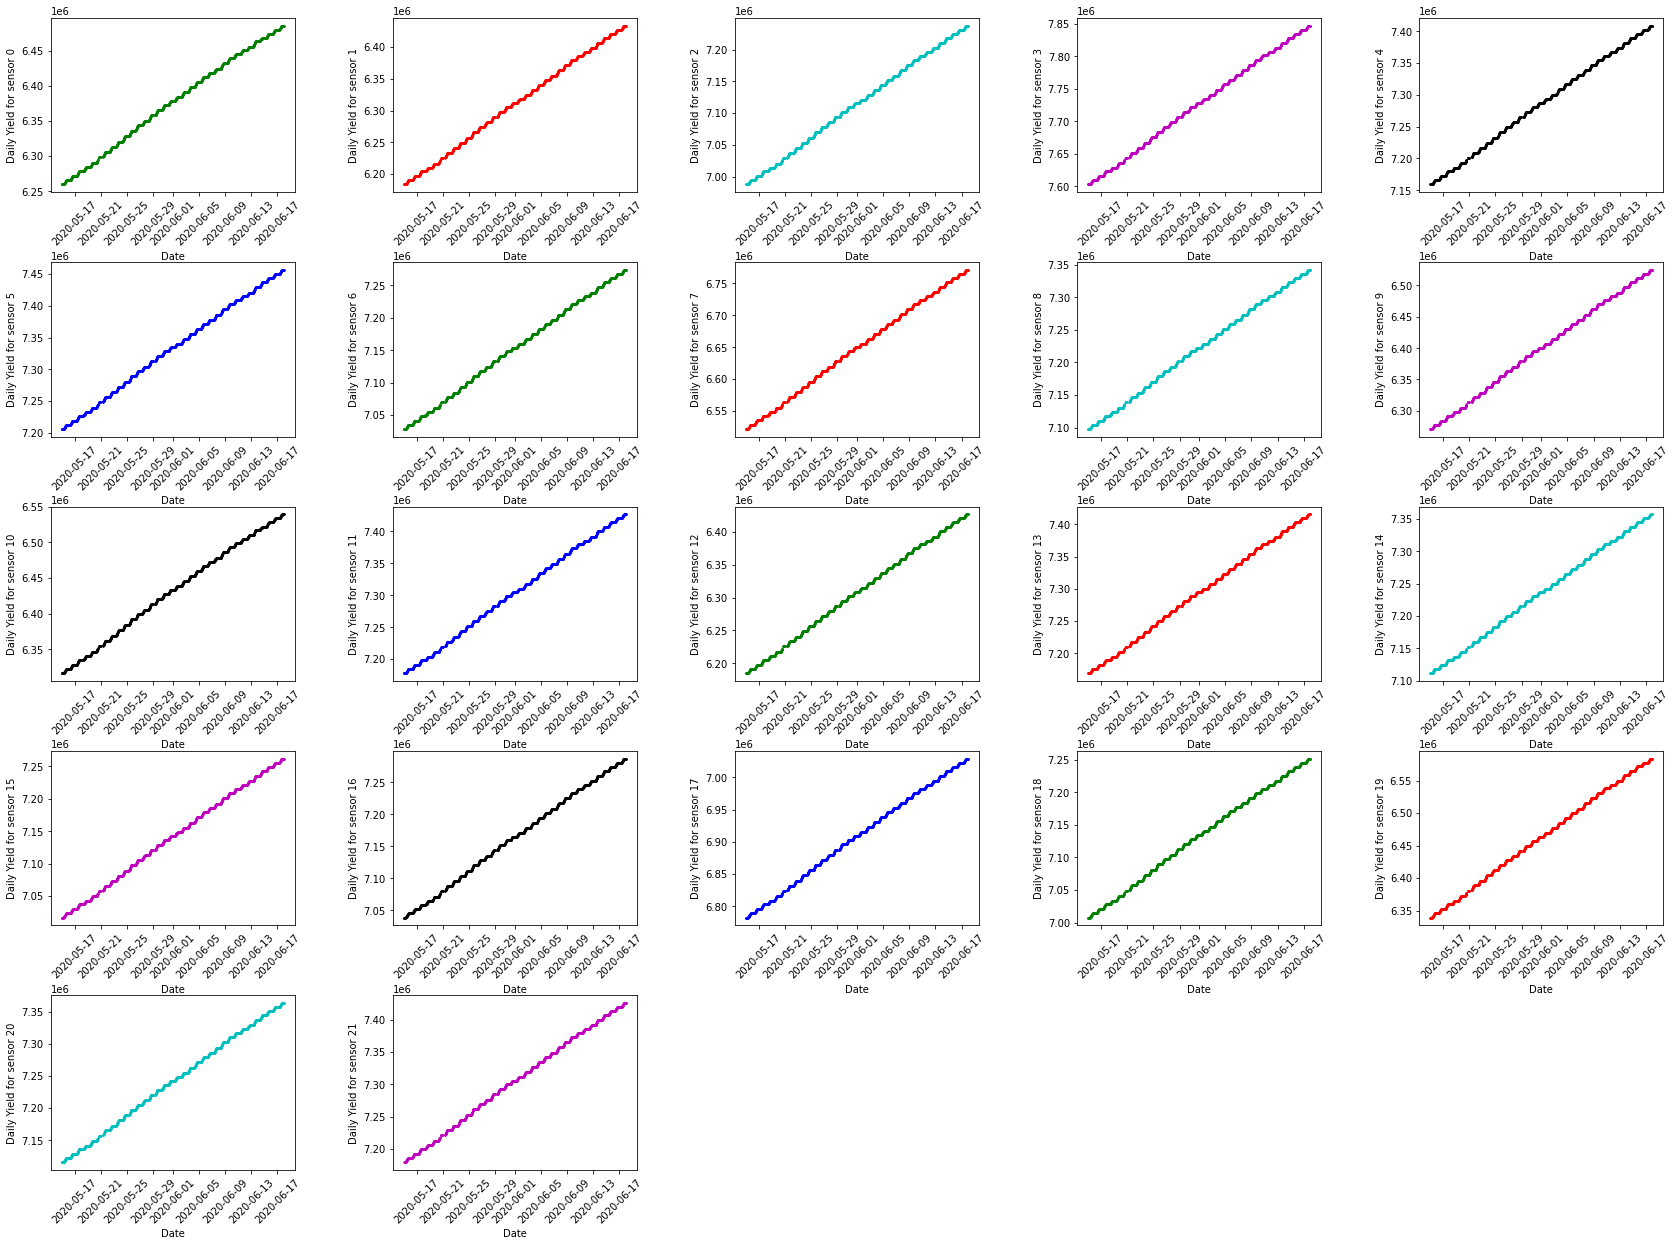

In [307]:
plt.figure(figsize=(28,20))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
for i in range(len(panels[:])):
  myvariable = test[test['sensor']==i]
  myvariable = myvariable[myvariable['TOTAL_YIELD']>=(myvariable['TOTAL_YIELD'].iloc[0])]
  plt.subplot(5,5, i+1)
  plt.scatter(myvariable.DATE_TIME, myvariable.TOTAL_YIELD,  s=1, c=next(cycol))
  plt.ylabel(f'Daily Yield for sensor {i}')
  plt.xlabel('Date')
  plt.xticks(rotation = 45)

#Plant 2

##Generalities

In [308]:
generation2 = pd.read_csv("/content/drive/MyDrive/eiLink/Plant_2_Generation_Data.csv")
weather2 = pd.read_csv("/content/drive/MyDrive/eiLink/Plant_2_Weather_Sensor_Data.csv")

In [309]:
print(generation2.head(2))
print(weather2.head(2))

             DATE_TIME  PLANT_ID  ... DAILY_YIELD   TOTAL_YIELD
0  2020-05-15 00:00:00   4136001  ...      9425.0  2.429011e+06
1  2020-05-15 00:00:00   4136001  ...         0.0  1.215279e+09

[2 rows x 7 columns]
             DATE_TIME  PLANT_ID  ... MODULE_TEMPERATURE  IRRADIATION
0  2020-05-15 00:00:00   4136001  ...          25.060789          0.0
1  2020-05-15 00:15:00   4136001  ...          24.421869          0.0

[2 rows x 6 columns]


Removing Seconds

In [310]:
generation2['DATE_TIME'] =  pd.to_datetime(generation2['DATE_TIME'], format='%Y-%m-%d %H:%M')
# .dt.strftime("%d-%m-%Y %H:%M")
weather2['DATE_TIME'] =  pd.to_datetime(weather2['DATE_TIME'], format='%Y-%m-%d %H:%M')
# .dt.strftime("%d-%m-%Y %H:%M")

In [311]:
show(generation2.head(10))

In [312]:
show(weather2.head(10))

Creatng one General Table

In [313]:
full_table2 = pd.merge(left=generation2, right=weather2, how="inner", left_on=['DATE_TIME', 'PLANT_ID'], right_on=['DATE_TIME', 'PLANT_ID'])
show(full_table2.head(10))

In [314]:
print(full_table2.columns)

Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY_x', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD', 'SOURCE_KEY_y', 'AMBIENT_TEMPERATURE',
       'MODULE_TEMPERATURE', 'IRRADIATION'],
      dtype='object')


Naming and Counting Panels

In [315]:
test = full_table2.copy()

panels = test['SOURCE_KEY_x'].unique()

# getting new colour for every iteration
from itertools import cycle
cycol = cycle('bgrcmk') 

for i, p in enumerate(panels):
  test.loc[test['SOURCE_KEY_x'] == p, "sensor"] = i
  print(p,"\t",i)

4UPUqMRk7TRMgml 	 0
81aHJ1q11NBPMrL 	 1
9kRcWv60rDACzjR 	 2
Et9kgGMDl729KT4 	 3
IQ2d7wF4YD8zU1Q 	 4
LYwnQax7tkwH5Cb 	 5
LlT2YUhhzqhg5Sw 	 6
Mx2yZCDsyf6DPfv 	 7
NgDl19wMapZy17u 	 8
PeE6FRyGXUgsRhN 	 9
Qf4GUc1pJu5T6c6 	 10
Quc1TzYxW2pYoWX 	 11
V94E5Ben1TlhnDV 	 12
WcxssY2VbP4hApt 	 13
mqwcsP2rE7J0TFp 	 14
oZ35aAeoifZaQzV 	 15
oZZkBaNadn6DNKz 	 16
q49J1IKaHRwDQnt 	 17
rrq4fwE8jgrTyWY 	 18
vOuJvMaM2sgwLmb 	 19
xMbIugepa2P7lBB 	 20
xoJJ8DcxJEcupym 	 21


Creating a new column for the difference in temperatures

In [316]:
full_table2['TEMPERATURE_DIFFERENCE']=full_table2['MODULE_TEMPERATURE'] - full_table2['AMBIENT_TEMPERATURE']
print(full_table2)

                DATE_TIME  PLANT_ID  ... IRRADIATION  TEMPERATURE_DIFFERENCE
0     2020-05-15 00:00:00   4136001  ...         0.0               -1.943975
1     2020-05-15 00:00:00   4136001  ...         0.0               -1.943975
2     2020-05-15 00:00:00   4136001  ...         0.0               -1.943975
3     2020-05-15 00:00:00   4136001  ...         0.0               -1.943975
4     2020-05-15 00:00:00   4136001  ...         0.0               -1.943975
...                   ...       ...  ...         ...                     ...
67693 2020-06-17 23:45:00   4136001  ...         0.0               -0.666963
67694 2020-06-17 23:45:00   4136001  ...         0.0               -0.666963
67695 2020-06-17 23:45:00   4136001  ...         0.0               -0.666963
67696 2020-06-17 23:45:00   4136001  ...         0.0               -0.666963
67697 2020-06-17 23:45:00   4136001  ...         0.0               -0.666963

[67698 rows x 12 columns]


In [317]:
show(full_table2.head(10))

Trying various plots for finding relations

In [318]:
# plt.figure(figsize=(28,20))
# for i in panels[:]:
#   myvariable = test[test['SOURCE_KEY_x']==i]
#   for ind,j in enumerate(['DATE_TIME', 'IRRADIATION', 'MODULE_TEMPERATURE', 'AMBIENT_TEMPERATURE']):
#     plt.subplot(5,1,ind+1)
#     plt.scatter(myvariable[j], myvariable['TOTAL_YIELD'], alpha=1, s=0.3, c = next(cycol))
#     plt.xlabel(j)
#     plt.ylabel('TOTAL_YIELD')
# plt.show()

In [319]:
# plt.figure(figsize=(28,20))
# for i in panels[:]:
#   myvariable = test[test['SOURCE_KEY_x']==i]
#   for ind,j in enumerate(['DATE_TIME', 'TOTAL_YIELD', 'MODULE_TEMPERATURE', 'AMBIENT_TEMPERATURE']):
#     plt.subplot(5,1,ind+1)
#     plt.scatter(myvariable[j], myvariable['IRRADIATION'], alpha=1, s=0.3, c = next(cycol))
#     plt.xlabel(j)
#     plt.ylabel('IRRADIATION')
# plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



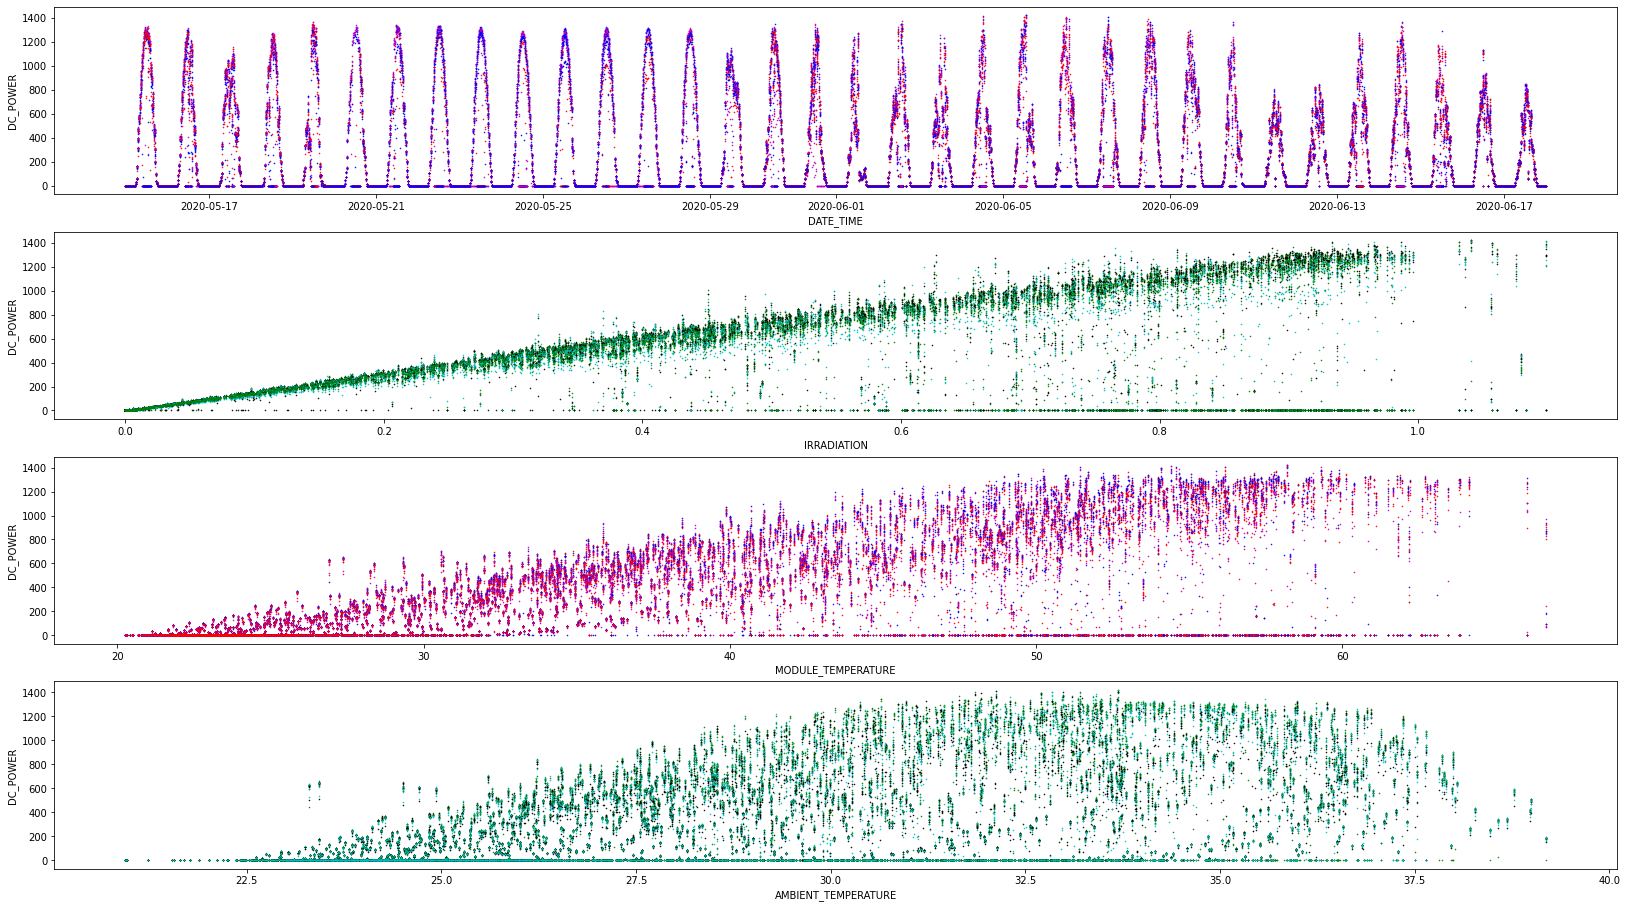

In [320]:
plt.figure(figsize=(28,20))
for i in panels[:]:
  myvariable = test[test['SOURCE_KEY_x']==i]
  for ind,j in enumerate(['DATE_TIME', 'IRRADIATION', 'MODULE_TEMPERATURE', 'AMBIENT_TEMPERATURE']):
    plt.subplot(5,1,ind+1)
    plt.scatter(myvariable[j], myvariable['DC_POWER'], alpha=1, s=0.3, c = next(cycol))
    plt.xlabel(j)
    plt.ylabel('DC_POWER')
plt.show()

In [321]:
import plotly.express as px
for i in panels[:]:
  myvariable = test[test['SOURCE_KEY_x']==i]
  fig = px.scatter(full_table2, x = 'IRRADIATION', y = 'TEMPERATURE_DIFFERENCE', trendline="ols")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

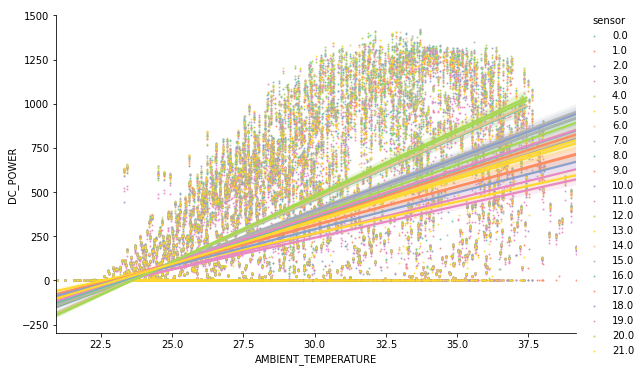

In [322]:
import seaborn as sns
graph= sns.lmplot(x='AMBIENT_TEMPERATURE', y='DC_POWER', hue='sensor',
               data=test, scatter_kws={"s": 1}, height = 5, aspect = 1.6, palette="Set2")

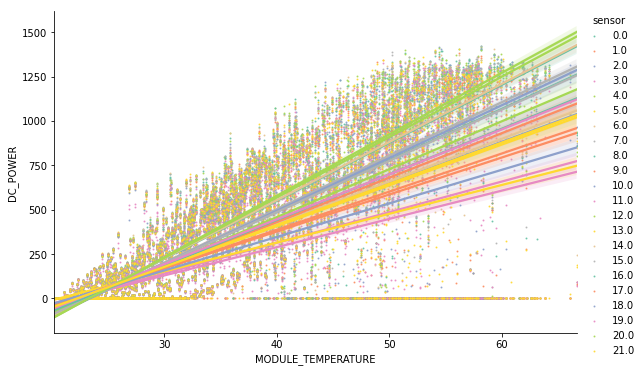

In [323]:
graph= sns.lmplot(x='MODULE_TEMPERATURE', y='DC_POWER', hue='sensor',
               data=test, scatter_kws={"s": 1}, height = 5, aspect = 1.6, palette="Set2")

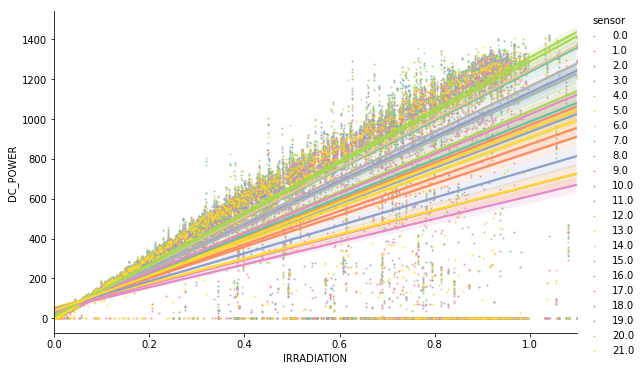

In [324]:
graph= sns.lmplot(x='IRRADIATION', y='DC_POWER', hue='sensor',
               data=test, scatter_kws={"s": 1}, height = 5, aspect = 1.6, palette="Set2")

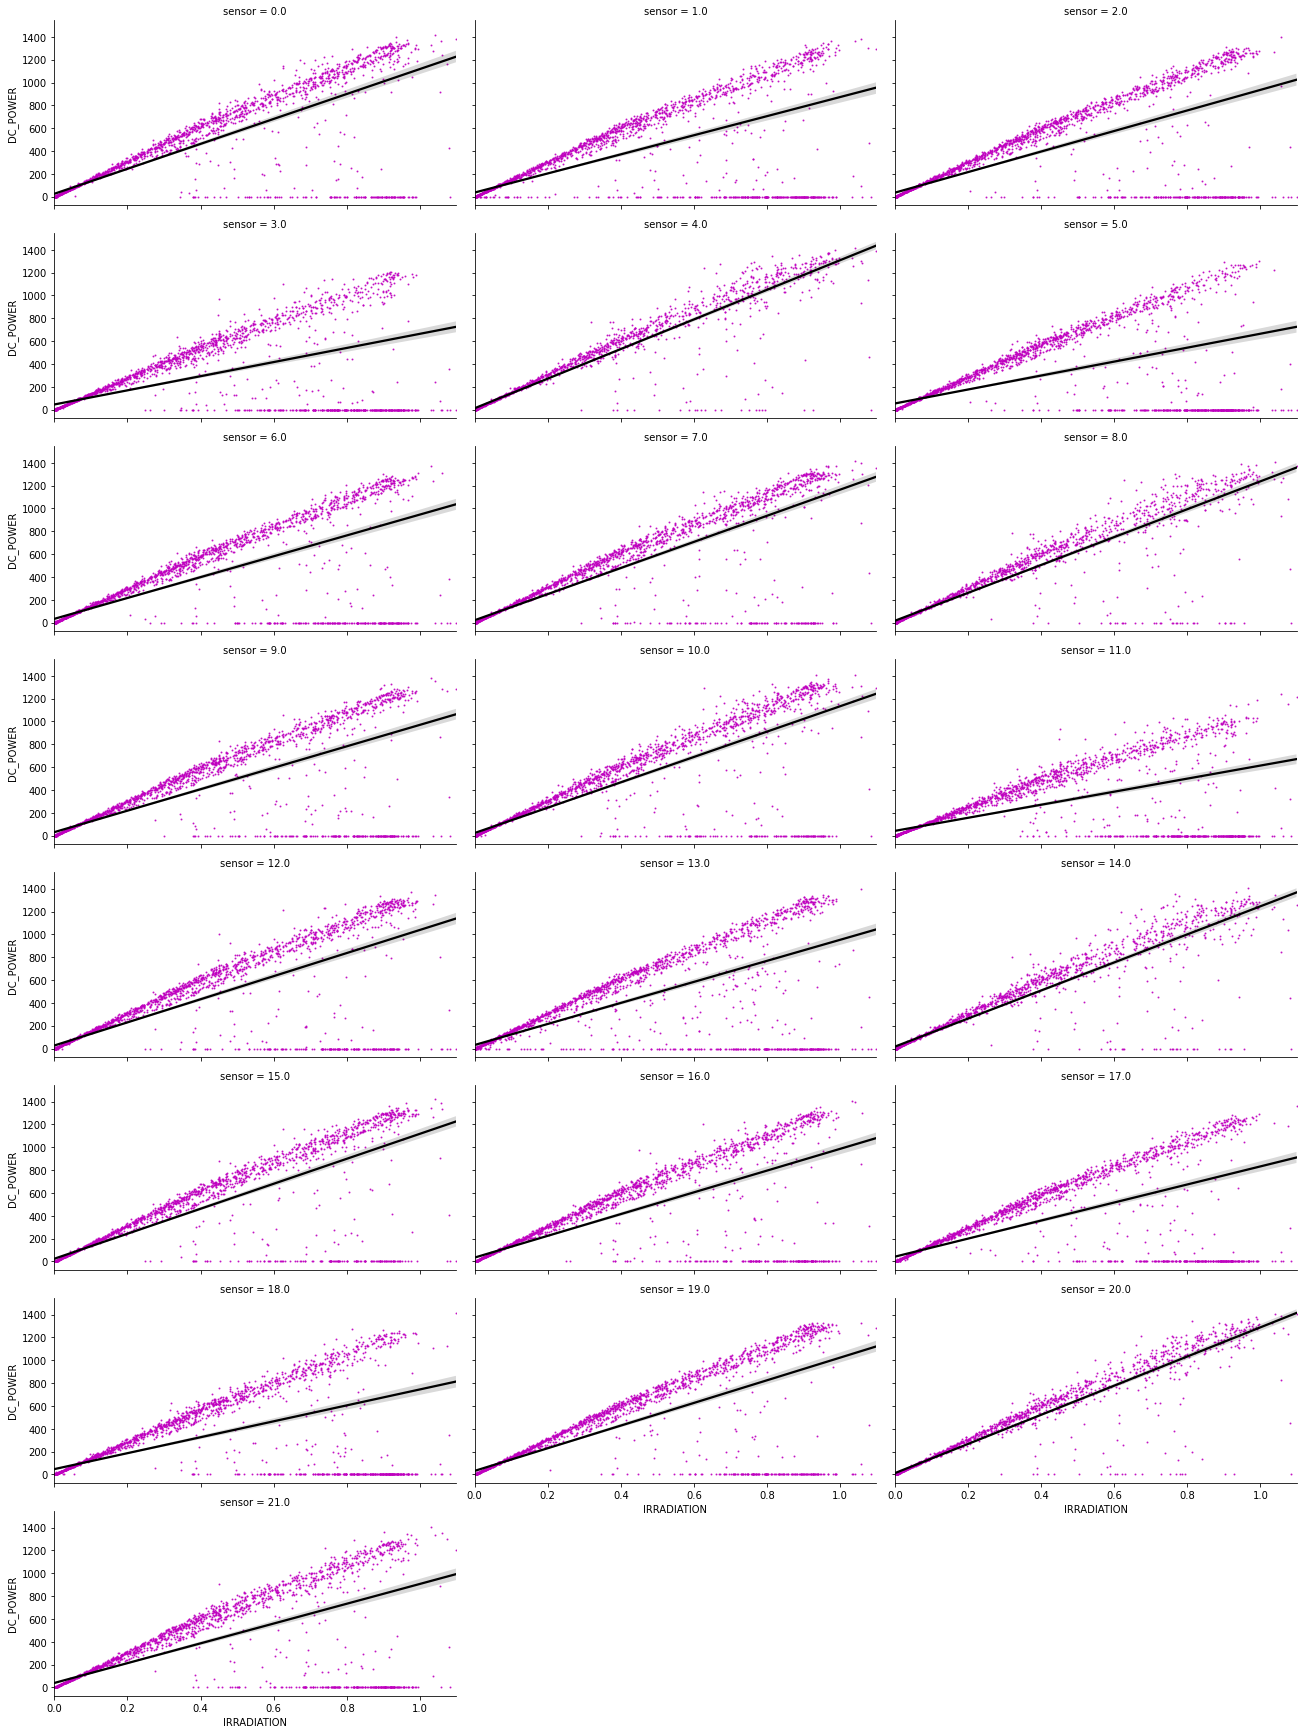

In [325]:
graph= sns.lmplot(x='IRRADIATION', y='DC_POWER', col='sensor', col_wrap=3, 
               data=test, scatter_kws={"s": 1, "color": next(cycol)}, height = 3, aspect = 2, line_kws={"color": next(cycol)})

##Cleaning/Maintenance

Deleting all rows where DC is 0

In [326]:
newtest = test[:]
print(newtest.shape, test.shape)

(67698, 12) (67698, 12)


In [327]:
newtest = newtest[newtest.DC_POWER != 0]
print(newtest.shape, test.shape)

(32036, 12) (67698, 12)


Visualising charts again

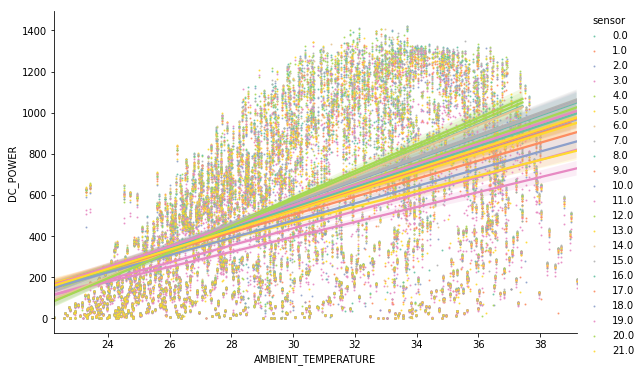

In [328]:
import seaborn as sns
graph= sns.lmplot(x='AMBIENT_TEMPERATURE', y='DC_POWER', hue='sensor',
               data=newtest, scatter_kws={"s": 1}, height = 5, aspect = 1.6, palette="Set2")

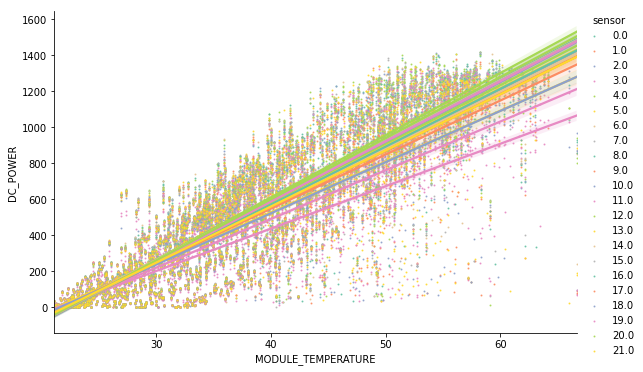

In [329]:
graph= sns.lmplot(x='MODULE_TEMPERATURE', y='DC_POWER', hue='sensor',
               data=newtest, scatter_kws={"s": 1}, height = 5, aspect = 1.6, palette="Set2")

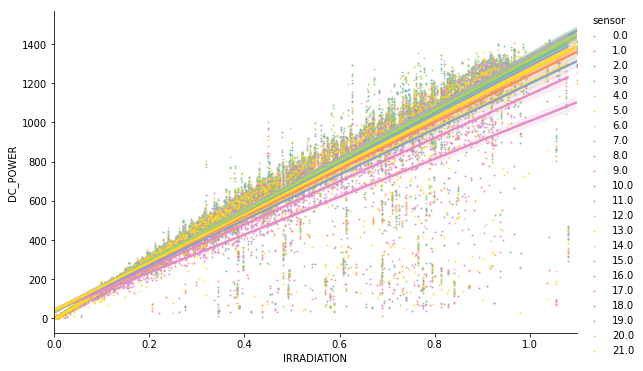

In [330]:
graph= sns.lmplot(x='IRRADIATION', y='DC_POWER', hue='sensor',
               data=newtest, scatter_kws={"s": 1}, height = 5, aspect = 1.6, palette="Set2")

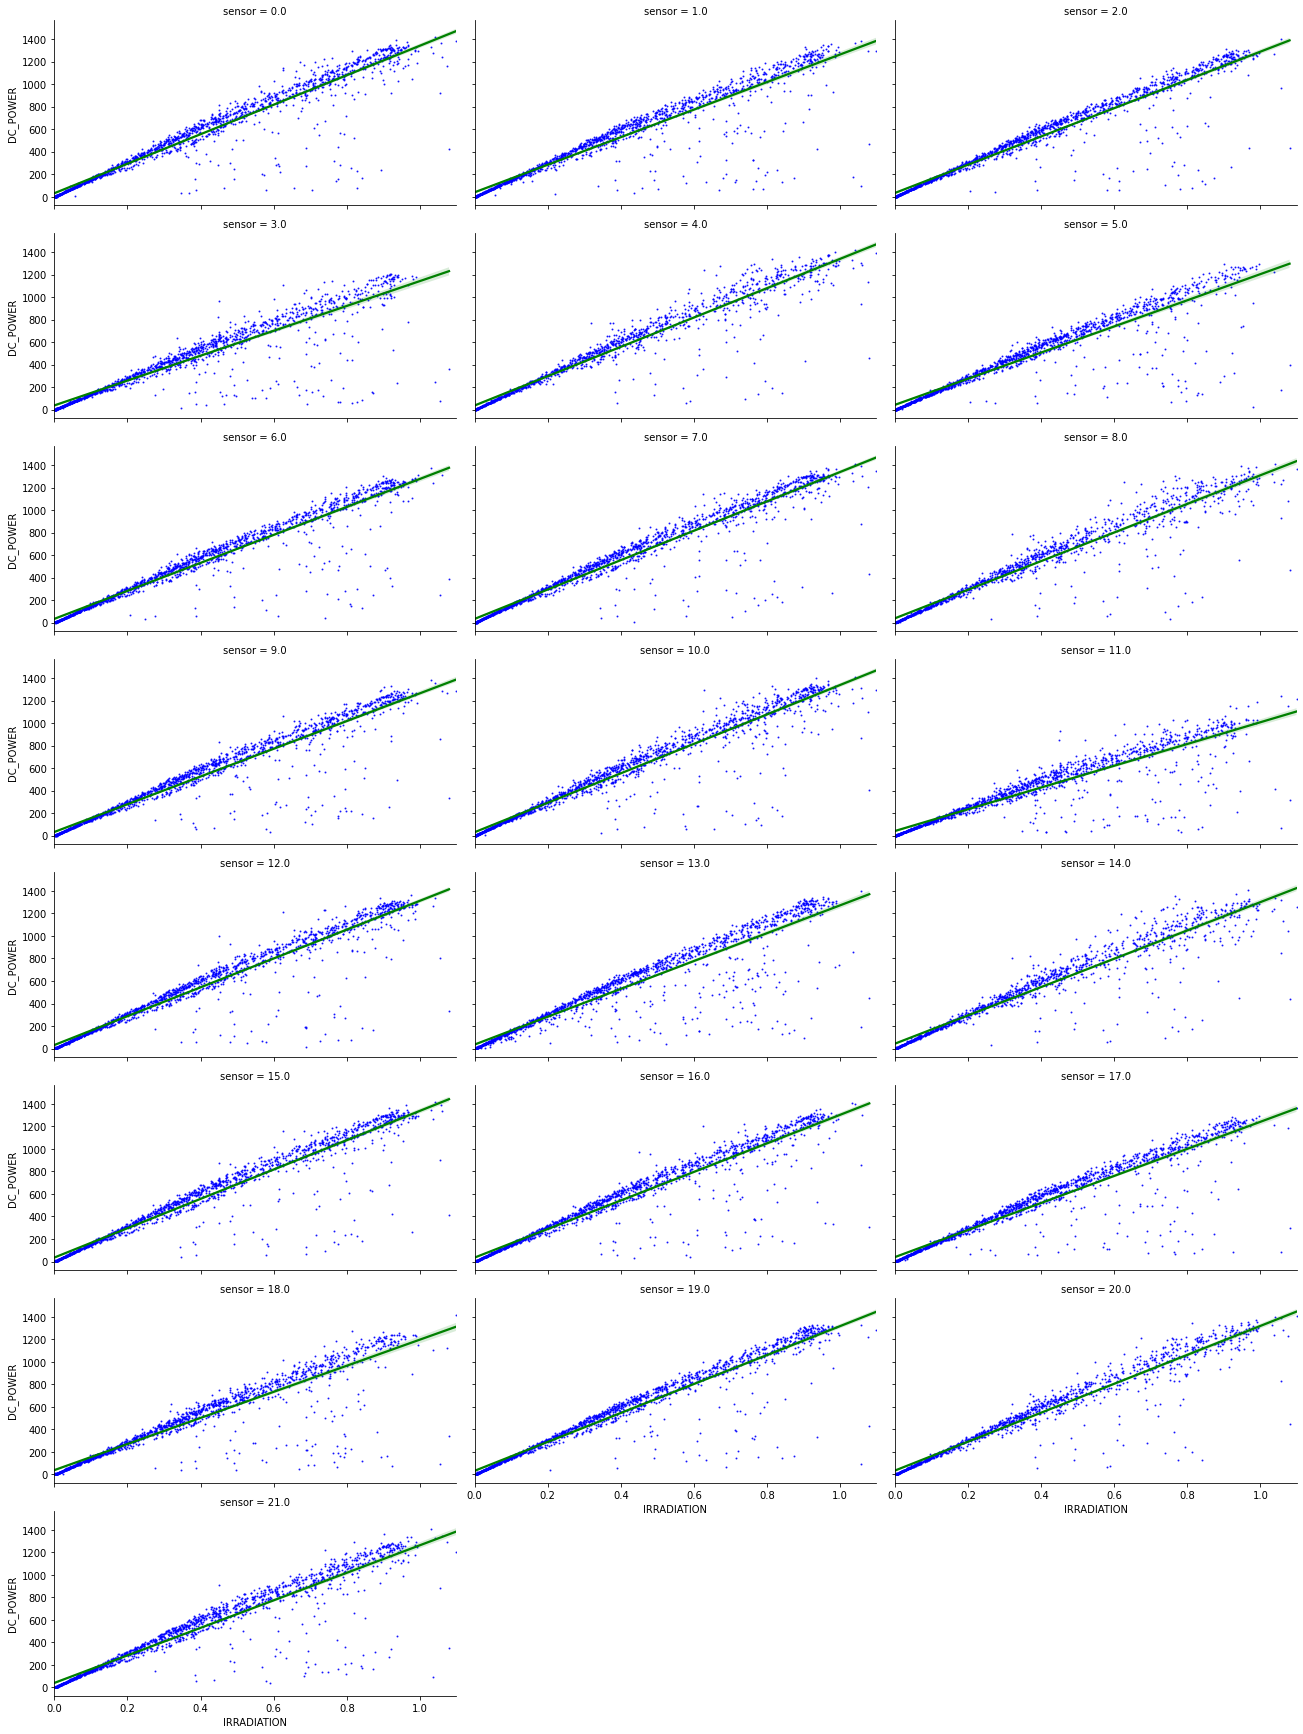

In [331]:
graph= sns.lmplot(x='IRRADIATION', y='DC_POWER', col='sensor', col_wrap=3, 
               data=newtest, scatter_kws={"s": 1, "color": next(cycol)}, height = 3, aspect = 2, line_kws={"color": next(cycol)})

Finding the slope for each sensor

In [332]:
from sklearn import linear_model
from sklearn import metrics
MAE=[]
MSE=[]
RMSE=[]

regr = linear_model.LinearRegression()
slopes = []
for i in range(len(panels[:])):
  myvariable = test[test['sensor']==i]
  x = myvariable['IRRADIATION'].values.reshape(-1,1)
  y = myvariable['DC_POWER'].values.reshape(-1,1)
  regr.fit(x,y)
  slopes.append(round(float(regr.coef_[0]),3))
  print(i,slopes[-1])

  MAE.append((round(float(metrics.mean_absolute_error(myvariable['IRRADIATION'], myvariable['DC_POWER'])),3)))
  MSE.append((round(float(metrics.mean_squared_error(myvariable['IRRADIATION'], myvariable['DC_POWER'])),3)))
  RMSE.append((round(float(np.sqrt(metrics.mean_squared_error(myvariable['IRRADIATION'], myvariable['DC_POWER']))),3)))

0 1092.603
1 836.599
2 900.286
3 618.826
4 1296.756
5 610.872
6 913.194
7 1143.8
8 1221.299
9 939.598
10 1110.596
11 571.993
12 1012.071
13 921.608
14 1229.127
15 1094.123
16 952.452
17 790.672
18 697.95
19 992.182
20 1277.023
21 867.255


Printing the values of errors

In [333]:
for i in range(len(panels[:])):
  print(f"For the sensor number {i}    MAE={MAE[i]}    MSE={MSE[i]}    RMSE={RMSE[i]}")

For the sensor number 0    MAE=277.591    MSE=238025.369    RMSE=487.878
For the sensor number 1    MAE=230.681    MSE=182841.999    RMSE=427.6
For the sensor number 2    MAE=244.521    MSE=196272.841    RMSE=443.027
For the sensor number 3    MAE=188.15    MSE=129018.779    RMSE=359.192
For the sensor number 4    MAE=285.327    MSE=239089.277    RMSE=488.968
For the sensor number 5    MAE=196.213    MSE=138305.62    RMSE=371.895
For the sensor number 6    MAE=245.356    MSE=196304.943    RMSE=443.063
For the sensor number 7    MAE=284.833    MSE=245951.734    RMSE=495.935
For the sensor number 8    MAE=273.333    MSE=222464.226    RMSE=471.661
For the sensor number 9    MAE=248.543    MSE=199269.634    RMSE=446.396
For the sensor number 10    MAE=278.574    MSE=239581.035    RMSE=489.47
For the sensor number 11    MAE=173.164    MSE=105604.951    RMSE=324.969
For the sensor number 12    MAE=262.006    MSE=219700.785    RMSE=468.723
For the sensor number 13    MAE=245.137    MSE=201118

In [334]:
MAEcopy=MAE.copy()
for i in range(len(panels[:])):
  print(f"Mean Absolute Error for sensor {MAE.index(max(MAEcopy))} is {max(MAEcopy)}")
  MAEcopy.remove(max(MAEcopy))

Mean Absolute Error for sensor 4 is 285.327
Mean Absolute Error for sensor 7 is 284.833
Mean Absolute Error for sensor 20 is 280.514
Mean Absolute Error for sensor 10 is 278.574
Mean Absolute Error for sensor 0 is 277.591
Mean Absolute Error for sensor 15 is 276.875
Mean Absolute Error for sensor 14 is 275.509
Mean Absolute Error for sensor 8 is 273.333
Mean Absolute Error for sensor 12 is 262.006
Mean Absolute Error for sensor 19 is 261.946
Mean Absolute Error for sensor 16 is 255.777
Mean Absolute Error for sensor 9 is 248.543
Mean Absolute Error for sensor 6 is 245.356
Mean Absolute Error for sensor 13 is 245.137
Mean Absolute Error for sensor 2 is 244.521
Mean Absolute Error for sensor 21 is 240.796
Mean Absolute Error for sensor 1 is 230.681
Mean Absolute Error for sensor 17 is 226.048
Mean Absolute Error for sensor 18 is 209.06
Mean Absolute Error for sensor 5 is 196.213
Mean Absolute Error for sensor 3 is 188.15
Mean Absolute Error for sensor 11 is 173.164


In [335]:
RMSEcopy=RMSE.copy()
for i in range(len(panels[:])):
  print(f"Root Mean Square Error for sensor {RMSE.index(max(RMSEcopy))} is {max(RMSEcopy)}")
  RMSEcopy.remove(max(RMSEcopy))

Root Mean Square Error for sensor 7 is 495.935
Root Mean Square Error for sensor 10 is 489.47
Root Mean Square Error for sensor 4 is 488.968
Root Mean Square Error for sensor 0 is 487.878
Root Mean Square Error for sensor 15 is 487.681
Root Mean Square Error for sensor 20 is 480.628
Root Mean Square Error for sensor 14 is 473.076
Root Mean Square Error for sensor 8 is 471.661
Root Mean Square Error for sensor 12 is 468.723
Root Mean Square Error for sensor 19 is 466.551
Root Mean Square Error for sensor 16 is 458.247
Root Mean Square Error for sensor 13 is 448.462
Root Mean Square Error for sensor 9 is 446.396
Root Mean Square Error for sensor 6 is 443.063
Root Mean Square Error for sensor 2 is 443.027
Root Mean Square Error for sensor 21 is 435.782
Root Mean Square Error for sensor 1 is 427.6
Root Mean Square Error for sensor 17 is 415.329
Root Mean Square Error for sensor 18 is 390.013
Root Mean Square Error for sensor 5 is 371.895
Root Mean Square Error for sensor 3 is 359.192
Root 

Finding the deviation of a slope relative to the average slope

In [336]:
slope_difference=[]
for i in slopes[:]:
  slope_difference.append(abs(i-np.mean(slopes)))

arranged_diff={}
for i in slope_difference:
  arranged_diff[slope_difference.index(i)]=i

arranged_diff=sorted(arranged_diff.items(), key=lambda x: x[1], reverse=True)
for key, value in arranged_diff:
    print(f"The slope difference for sensor {key} is {round(value,3)}")

The slope difference for sensor 11 is 386.684
The slope difference for sensor 5 is 347.805
The slope difference for sensor 3 is 339.851
The slope difference for sensor 4 is 338.079
The slope difference for sensor 20 is 318.346
The slope difference for sensor 14 is 270.45
The slope difference for sensor 8 is 262.622
The slope difference for sensor 18 is 260.727
The slope difference for sensor 7 is 185.123
The slope difference for sensor 17 is 168.005
The slope difference for sensor 10 is 151.919
The slope difference for sensor 15 is 135.446
The slope difference for sensor 0 is 133.926
The slope difference for sensor 1 is 122.078
The slope difference for sensor 21 is 91.422
The slope difference for sensor 2 is 58.391
The slope difference for sensor 12 is 53.394
The slope difference for sensor 6 is 45.483
The slope difference for sensor 13 is 37.069
The slope difference for sensor 19 is 33.505
The slope difference for sensor 9 is 19.079
The slope difference for sensor 16 is 6.225


##Forecast/Prediction

Neural Networks Keras

In [337]:
dataset = full_table2.values
dataset

array([[Timestamp('2020-05-15 00:00:00'), 4136001, '4UPUqMRk7TRMgml',
        ..., 25.0607889, 0.0, -1.9439748000000066],
       [Timestamp('2020-05-15 00:00:00'), 4136001, '81aHJ1q11NBPMrL',
        ..., 25.0607889, 0.0, -1.9439748000000066],
       [Timestamp('2020-05-15 00:00:00'), 4136001, '9kRcWv60rDACzjR',
        ..., 25.0607889, 0.0, -1.9439748000000066],
       ...,
       [Timestamp('2020-06-17 23:45:00'), 4136001, 'vOuJvMaM2sgwLmb',
        ..., 22.53590765517241, 0.0, -0.666963034482766],
       [Timestamp('2020-06-17 23:45:00'), 4136001, 'xMbIugepa2P7lBB',
        ..., 22.53590765517241, 0.0, -0.666963034482766],
       [Timestamp('2020-06-17 23:45:00'), 4136001, 'xoJJ8DcxJEcupym',
        ..., 22.53590765517241, 0.0, -0.666963034482766]], dtype=object)

In [338]:
X = dataset[:,3:7]
Y = dataset[:,10]
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

Training the model

In [339]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(4,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.add(Dense(1, input_dim=1, kernel_initializer ='normal', activation='relu'))

model.compile(optimizer='adam',loss='mean_squared_error')

X_train=np.asarray(X_train).astype(np.int)
Y_train=np.asarray(Y_train).astype(np.int)

X_val=np.asarray(X_val).astype(np.int)
Y_val=np.asarray(Y_val).astype(np.int)

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
1481/1481 [==============================] - 3s 2ms/step - loss: 0.0034 - val_loss: 0.0029
Epoch 2/100
1481/1481 [==============================] - 2s 1ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 3/100
1481/1481 [==============================] - 2s 1ms/step - loss: 0.0034 - val_loss: 0.0029
Epoch 4/100
1481/1481 [==============================] - 2s 1ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 5/100
1481/1481 [==============================] - 2s 1ms/step - loss: 0.0039 - val_loss: 0.0029
Epoch 6/100
1481/1481 [==============================] - 2s 1ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 7/100
1481/1481 [==============================] - 2s 1ms/step - loss: 0.0036 - val_loss: 0.0029
Epoch 8/100
1481/1481 [==============================] - 2s 1ms/step - loss: 0.0034 - val_loss: 0.0029
Epoch 9/100
1481/1481 [==============================] - 2s 1ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 10/100
1481/1481 [==============================] - 2s 1ms/step - l

Evaluating the loss

In [340]:
X_test=np.asarray(X_test).astype(np.int)
Y_test=np.asarray(Y_test).astype(np.int)

model.evaluate(X_test, Y_test)

318/318 [==============================] - 0s 841us/step - loss: 0.0027


0.002658788813278079

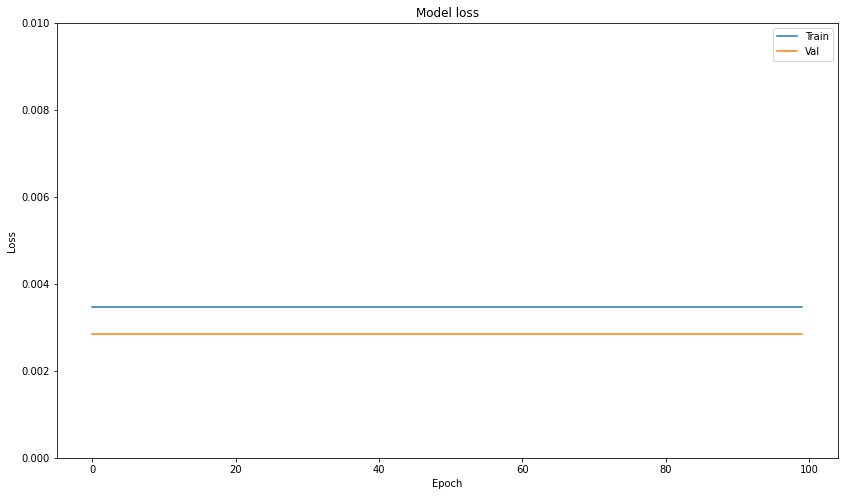

In [341]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(0.00, 0.01)
plt.show()

Prophet

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


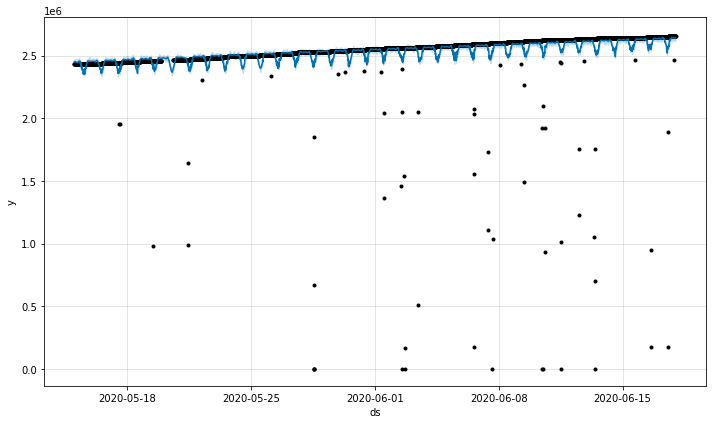

In [342]:
def predict(data, with_regr = True, num_days = 0, interval_width=0.05):
  myvariable = data.copy()
  myvariable.rename(columns={'DATE_TIME':'ds','TOTAL_YIELD':'y'}, inplace=True)
  from fbprophet import Prophet
  m = Prophet(interval_width=interval_width, daily_seasonality=True,
              weekly_seasonality=False)
  if with_regr:
    m.add_regressor('IRRADIATION')
  model = m.fit(myvariable)
  if with_regr:
    future = weather[['DATE_TIME',"IRRADIATION"]]
    future.columns = ['ds','IRRADIATION']
  else:
    future = m.make_future_dataframe(periods=24*num_days,freq='h')
    future.tail()
  forecast = m.predict(future)
  forecast.tail()
  plot1 = m.plot(forecast)
  # plot2 = m.plot_components(forecast)

predict(test[test.sensor==0])

In [343]:
newtest = newtest[newtest.TOTAL_YIELD >2300000]
print(newtest.shape, test.shape)

(28524, 12) (67698, 12)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


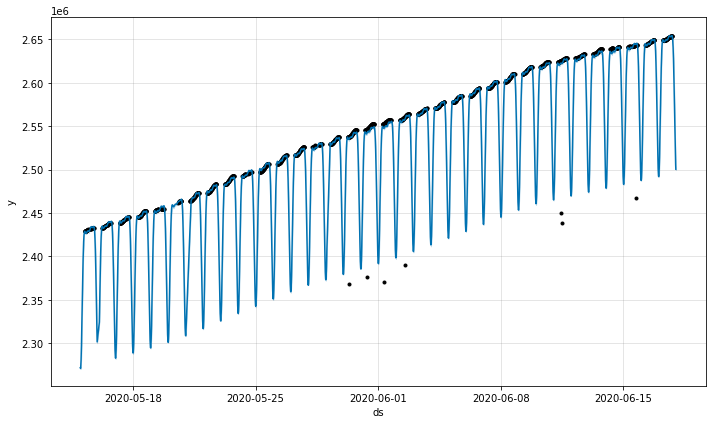

In [344]:
predict(newtest[newtest.sensor==0])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


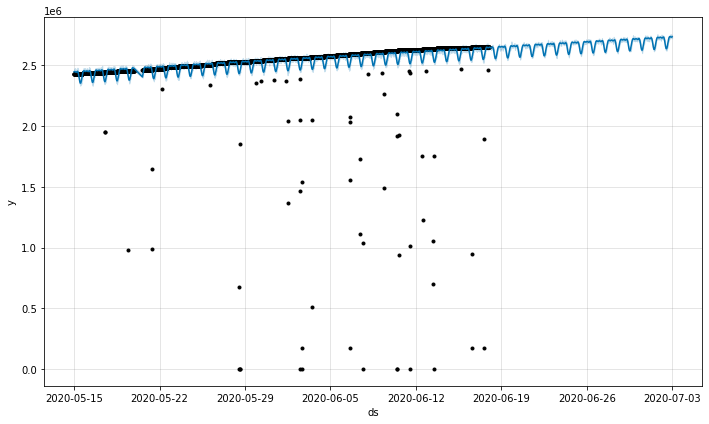

In [345]:
predict(test[test.sensor==0], with_regr=False, num_days = 15)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


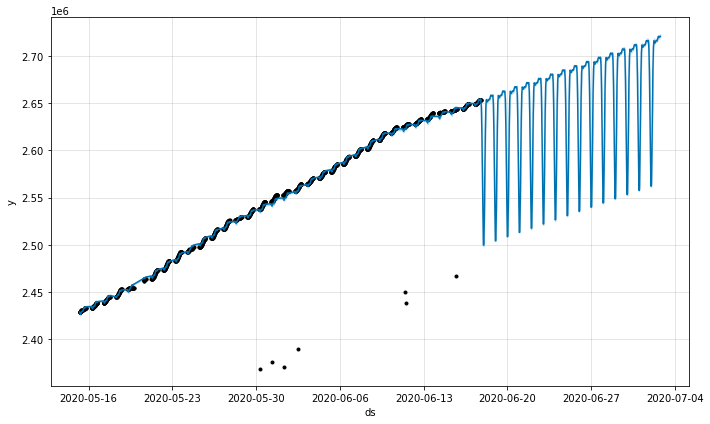

In [346]:
predict(newtest[newtest.sensor==0], with_regr=False, num_days = 15)

##Repair

Text(0.5, 0, 'Date')

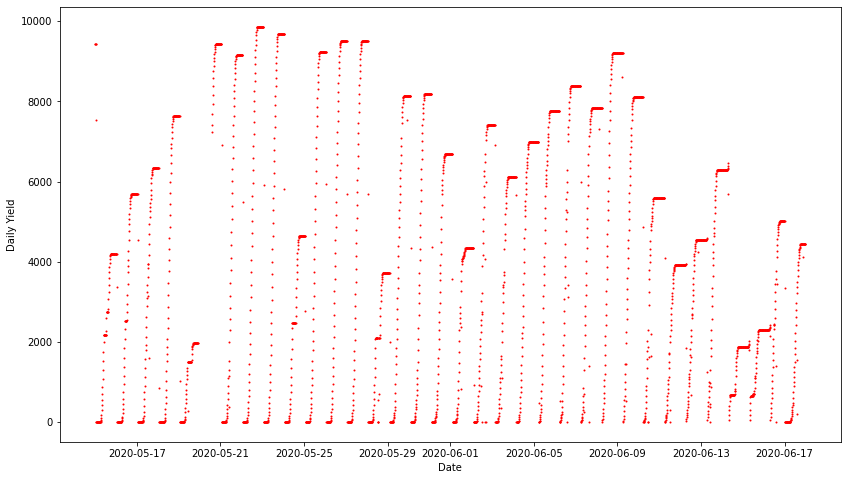

In [347]:
plt.rcParams['figure.figsize'] = (14, 8)
myvariable = test[test['sensor']==0]
myvariable = myvariable[myvariable['DAILY_YIELD']>=0]
plt.scatter(myvariable.DATE_TIME, myvariable.DAILY_YIELD, s=1, c=next(cycol))
plt.ylabel('Daily Yield')
plt.xlabel('Date')

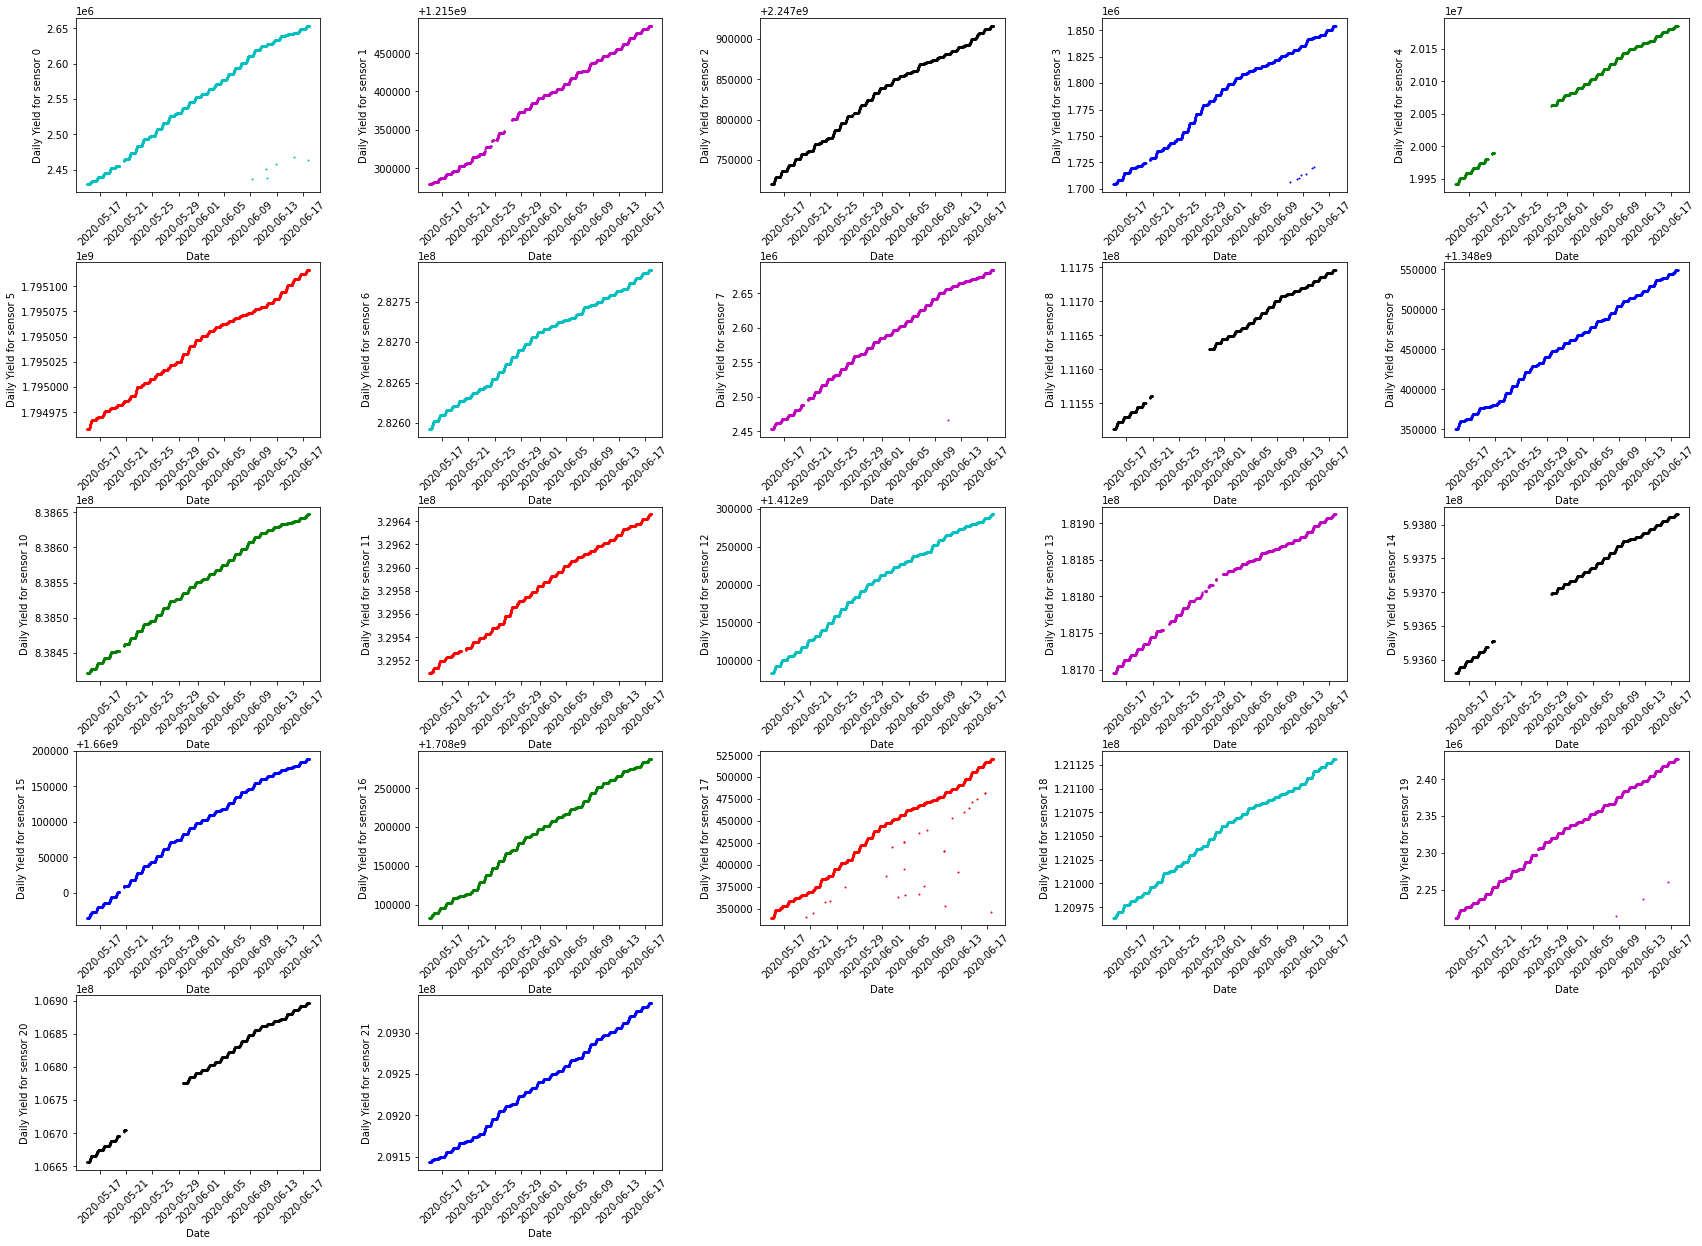

In [348]:
plt.figure(figsize=(28,20))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
for i in range(len(panels[:])):
  myvariable = test[test['sensor']==i]
  myvariable = myvariable[myvariable['TOTAL_YIELD']>=(myvariable['TOTAL_YIELD'].iloc[0])]
  plt.subplot(5,5, i+1)
  plt.scatter(myvariable.DATE_TIME, myvariable.TOTAL_YIELD,  s=1, c=next(cycol))
  plt.ylabel(f'Daily Yield for sensor {i}')
  plt.xlabel('Date')
  plt.xticks(rotation = 45)
plt.show()